In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict
from time import time


In [2]:
np.random.seed(123)
data_size, dims, num_clusters = 1000, 2, 3
x = np.random.randn(data_size, dims) / 6
x = torch.from_numpy(x)

In [3]:
if getattr(torch,'has_mps',False):
    device = "mps" 
    print(f"Using device: {device}")
else:
    device = torch.device('cpu')
    print(f"Using device: {device}")

Using device: mps


In [4]:
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on mps..


[running kmeans]: 7it [00:00, 28.79it/s, center_shift=0.000068, iteration=7, tol=0.000100]


In [5]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1,
        2, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
        0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1,
        1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1,
        1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2,
        2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0,
        2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0,
        2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2,
        0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0,
        0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1,
        1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1,
        0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0,

In [6]:
y = np.random.randn(5, dims) / 6
y = torch.from_numpy(y)
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)
print(cluster_ids_y)


predicting on mps..
tensor([1, 2, 0, 1, 2])


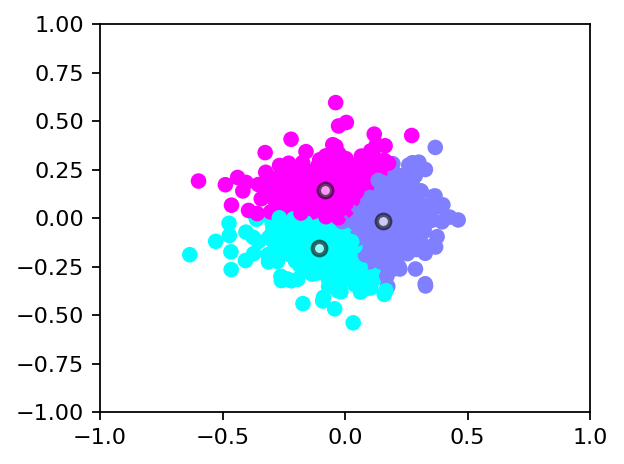

In [7]:
# plot
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()

In [12]:
dims, num_clusters = 2, 3
data_sizes = [100000, 1000000, 5000000, 10000000, 20000000, 30000000, 40000000, 50000000]
gpu_times = []
cpu_times = []

for data_size in data_sizes:
    print(f'\ndata size: {data_size}')

    # data
    x = np.random.randn(data_size, dims) / 6
    x = torch.from_numpy(x)

    # gpu
    start_gpu = time()
    kmeans_gpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('mps'))
    gpu_time = time() - start_gpu
    gpu_times.append(gpu_time)
    print(f'gpu time: {gpu_time}')
    
    # cpu
    start_cpu = time()
    kmeans_cpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cpu'))
    cpu_time = time() - start_cpu
    cpu_times.append(cpu_time)
    print(f'cpu time: {cpu_time}')


data size: 100000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.018803, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  3.48it/s, center_shift=0.018803, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  3.48it/s, center_shift=0.014471, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  3.61it/s, center_shift=0.014471, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  3.61it/s, center_shift=0.003386, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00,  3.64it/s, center_shift=0.003386, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  3.64it/s, center_shift=0.000415, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  3.68it/s, center_shift=0.000415, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  3.68it/s, center_shift=0.000100, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:01,  3.66it/s, center_shift=0.000100, iteration=5, tol=0.000100]


gpu time: 1.3761389255523682
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.192677, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 104.06it/s, center_shift=0.002623, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 144.47it/s, center_shift=0.000788, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 157.06it/s, center_shift=0.000260, iteration=4, tol=0.000100]

[running kmeans]: 5it [00:00, 208.29it/s, center_shift=0.000087, iteration=5, tol=0.000100]


cpu time: 0.030105113983154297

data size: 1000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.049559, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  3.48it/s, center_shift=0.049559, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  3.48it/s, center_shift=0.015533, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  3.51it/s, center_shift=0.015533, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  3.51it/s, center_shift=0.007448, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00,  3.51it/s, center_shift=0.007448, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  3.51it/s, center_shift=0.001595, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  3.52it/s, center_shift=0.001595, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  3.52it/s, center_shift=0.000427, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:01,  3.52it/s, center_shift=0.000427, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:01,  3.52it/s, cen

gpu time: 2.028615951538086
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.025433, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00, 26.52it/s, center_shift=0.012278, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 35.55it/s, center_shift=0.003646, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 39.69it/s, center_shift=0.000956, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 42.20it/s, center_shift=0.000314, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 43.84it/s, center_shift=0.000104, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 52.38it/s, center_shift=0.000104, iteration=6, tol=0.000100]

[running kmeans]: 7it [00:00, 51.91it/s, center_shift=0.000035, iteration=7, tol=0.000100]


cpu time: 0.1486060619354248

data size: 5000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.213378, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  2.97it/s, center_shift=0.213378, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  2.97it/s, center_shift=0.009703, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  2.98it/s, center_shift=0.009703, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  2.98it/s, center_shift=0.014883, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  2.99it/s, center_shift=0.014883, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  2.99it/s, center_shift=0.004091, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  2.98it/s, center_shift=0.004091, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  2.98it/s, center_shift=0.000523, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:01,  2.98it/s, center_shift=0.000523, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:02,  2.98it/s, cen

gpu time: 2.440760612487793
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.077188, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  6.64it/s, center_shift=0.008125, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 13.25it/s, center_shift=0.008125, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 13.25it/s, center_shift=0.002511, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 13.25it/s, center_shift=0.000814, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 12.90it/s, center_shift=0.000814, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 12.90it/s, center_shift=0.000268, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 12.90it/s, center_shift=0.000089, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 12.84it/s, center_shift=0.000089, iteration=6, tol=0.000100]


cpu time: 0.5505127906799316

data size: 10000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.071239, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  2.42it/s, center_shift=0.071239, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  2.42it/s, center_shift=0.015620, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  2.41it/s, center_shift=0.015620, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  2.41it/s, center_shift=0.005663, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  2.43it/s, center_shift=0.005663, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  2.43it/s, center_shift=0.001896, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  2.44it/s, center_shift=0.001896, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  2.44it/s, center_shift=0.000637, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:02,  2.45it/s, center_shift=0.000637, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:02,  2.45it/s, cen

gpu time: 3.06750226020813
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.108041, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  6.90it/s, center_shift=0.108041, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  6.90it/s, center_shift=0.007395, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  6.64it/s, center_shift=0.007395, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  6.64it/s, center_shift=0.002008, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00,  6.73it/s, center_shift=0.002008, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00,  6.73it/s, center_shift=0.000625, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00,  6.80it/s, center_shift=0.000625, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00,  6.80it/s, center_shift=0.000205, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00,  6.87it/s, center_shift=0.000205, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00,  6.87it/s, cen

cpu time: 1.0804698467254639

data size: 20000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.124497, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  1.76it/s, center_shift=0.124497, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.76it/s, center_shift=0.009071, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.76it/s, center_shift=0.009071, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.76it/s, center_shift=0.001408, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  1.79it/s, center_shift=0.001408, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.79it/s, center_shift=0.000417, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  1.81it/s, center_shift=0.000417, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  1.81it/s, center_shift=0.000136, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:02,  1.83it/s, center_shift=0.000136, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:03,  1.83it/s, cen

gpu time: 3.7930960655212402
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.125894, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  3.63it/s, center_shift=0.125894, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  3.63it/s, center_shift=0.010169, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  3.57it/s, center_shift=0.010169, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  3.57it/s, center_shift=0.002466, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00,  3.50it/s, center_shift=0.002466, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  3.50it/s, center_shift=0.000539, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  3.52it/s, center_shift=0.000539, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  3.52it/s, center_shift=0.000170, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:01,  3.49it/s, center_shift=0.000170, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:01,  3.49it/s, cen

cpu time: 2.141098976135254

data size: 30000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.099751, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  1.48it/s, center_shift=0.099751, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.48it/s, center_shift=0.015851, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.45it/s, center_shift=0.015851, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:02,  1.45it/s, center_shift=0.015702, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.44it/s, center_shift=0.015702, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.44it/s, center_shift=0.009611, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  1.43it/s, center_shift=0.009611, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:03,  1.43it/s, center_shift=0.001951, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:03,  1.44it/s, center_shift=0.001951, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:04,  1.44it/s, cen

gpu time: 6.173159122467041
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.041883, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  2.32it/s, center_shift=0.041883, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  2.32it/s, center_shift=0.003662, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00,  2.34it/s, center_shift=0.003662, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  2.34it/s, center_shift=0.000140, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  2.32it/s, center_shift=0.000140, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  2.32it/s, center_shift=0.000007, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:01,  2.33it/s, center_shift=0.000007, iteration=4, tol=0.000100]


cpu time: 2.4203269481658936

data size: 40000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.050145, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  1.26it/s, center_shift=0.050145, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.26it/s, center_shift=0.006659, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.18it/s, center_shift=0.006659, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:02,  1.18it/s, center_shift=0.002197, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.17it/s, center_shift=0.002197, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:03,  1.17it/s, center_shift=0.000736, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:03,  1.18it/s, center_shift=0.000736, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:04,  1.18it/s, center_shift=0.000249, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:04,  1.19it/s, center_shift=0.000249, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:05,  1.19it/s, cen

gpu time: 6.036035776138306
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.125803, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  1.75it/s, center_shift=0.125803, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.75it/s, center_shift=0.010067, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.78it/s, center_shift=0.010067, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.78it/s, center_shift=0.002491, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:01,  1.75it/s, center_shift=0.002491, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.75it/s, center_shift=0.000737, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  1.78it/s, center_shift=0.000737, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  1.78it/s, center_shift=0.000241, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:02,  1.80it/s, center_shift=0.000241, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:03,  1.80it/s, cen

cpu time: 4.3644490242004395

data size: 50000000
running k-means on mps..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:01, ?it/s, center_shift=0.030395, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.08s/it, center_shift=0.030395, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:02,  1.08s/it, center_shift=0.011838, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:02,  1.20s/it, center_shift=0.011838, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:03,  1.20s/it, center_shift=0.003567, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:03,  1.18s/it, center_shift=0.003567, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:04,  1.18s/it, center_shift=0.001099, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:04,  1.19s/it, center_shift=0.001099, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:05,  1.19s/it, center_shift=0.000367, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:05,  1.16s/it, center_shift=0.000367, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:06,  1.16s/it, cen

gpu time: 9.349697828292847
running k-means on cpu..




[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.055786, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:00,  1.37it/s, center_shift=0.055786, iteration=1, tol=0.000100]

[running kmeans]: 1it [00:01,  1.37it/s, center_shift=0.006982, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:01,  1.39it/s, center_shift=0.006982, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:02,  1.39it/s, center_shift=0.001717, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.41it/s, center_shift=0.001717, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:02,  1.41it/s, center_shift=0.000523, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:02,  1.41it/s, center_shift=0.000523, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:03,  1.41it/s, center_shift=0.000170, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:03,  1.29it/s, center_shift=0.000170, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:04,  1.29it/s, cen

cpu time: 6.029508829116821


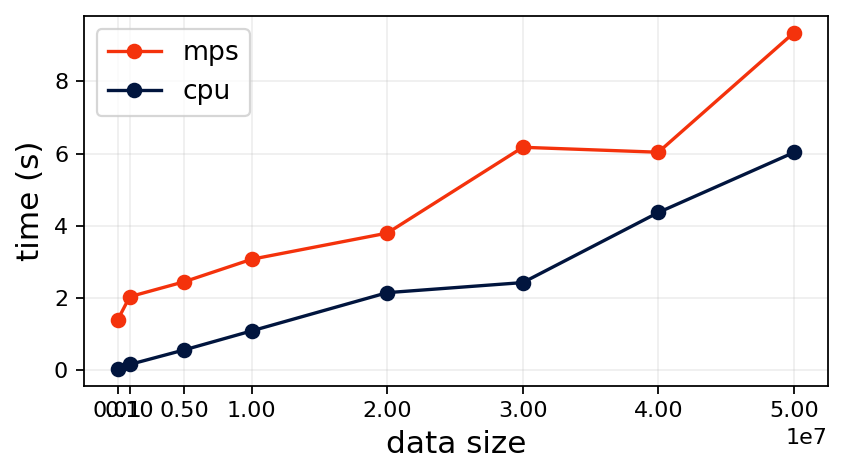

In [13]:
plt.figure(figsize=(6, 3), dpi=160)
plt.plot(data_sizes, gpu_times, marker='o', label='mps', color='xkcd:vermillion')
plt.plot(data_sizes, cpu_times, marker='o', label='cpu', color='xkcd:navy')
plt.xticks(data_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.2)
plt.xlabel('data size', fontsize=14)
plt.ylabel('time (s)', fontsize=14)
plt.show()
